In [1]:
import cv2
import os
import torch
import matplotlib.pyplot as plt
import random

In [2]:
folder = "images/faces" # path to images
faces = []

for face in os.listdir(folder):
    image = cv2.imread(os.path.join(folder, face), cv2.IMREAD_GRAYSCALE) 
    if image is not None:

        image = cv2.resize(image, (100, 100)).flatten() 
        faces.append(image) 

faces = torch.tensor(faces, dtype = float)
faces.shape

C:\Users\jiakh\AppData\Local\Temp\ipykernel_33836\2520494884.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  faces = torch.tensor(faces, dtype = float)


torch.Size([13233, 10000])

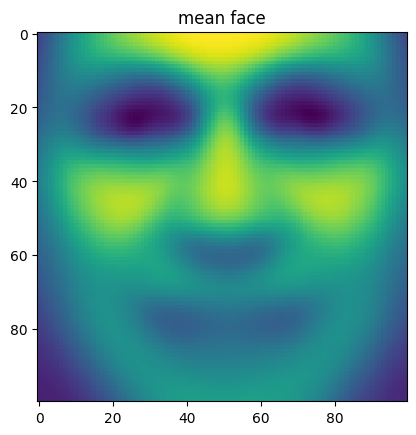

torch.Size([10000])

In [3]:
mean = torch.mean(faces, dim = 0) 
mean_img = mean.reshape(100, 100)

plt.imshow(mean_img)
plt.title("mean face")

plt.show()

mean.shape

evaluating normalized faces and performing principal component analysis

In [4]:
centered = faces - mean 
centered_t = centered.T

centered.shape

torch.Size([13233, 10000])

In [5]:
u, s, v = torch.pca_lowrank(centered_t, q = 4000) 

eigenvectors, eigenvalues = u, s
eigenvectors.shape

torch.Size([10000, 4000])

displaying the first 10 eigenfaces

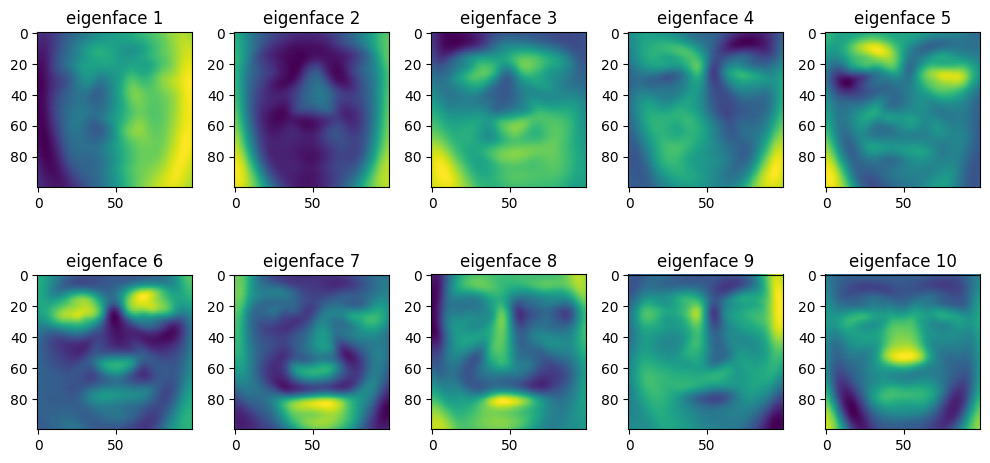

In [6]:
display_eigenfaces = eigenvectors.T[:10] 

plt.figure(figsize = (10, 5))
for i in range(10):
    eigenface = display_eigenfaces[i].reshape(100, 100)
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenface)
    plt.title(f"eigenface {i + 1}")

plt.tight_layout()
plt.show()


demonstrating reconstruction with a random demo image from the dataset

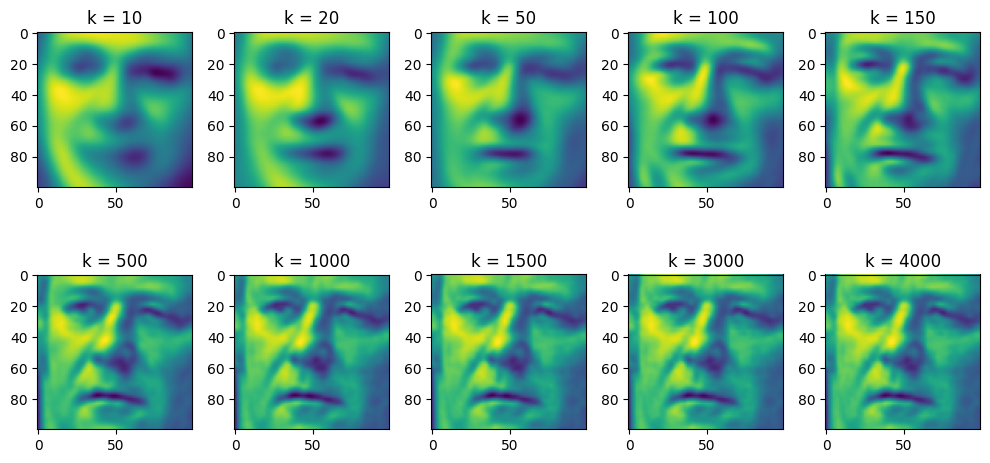

In [7]:
demo_face = random.randrange(0, len(faces))

plt.figure(figsize= (10, 5))
for k, i in zip([9, 19, 49, 99, 149, 499, 999, 1499, 2999, 3999], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    eigenvectors_rec = eigenvectors[:, :k+1]
    weight = torch.matmul(centered[demo_face, :], eigenvectors_rec)

    projected = torch.matmul(weight, eigenvectors_rec.T)
    reconstructed = projected + mean

    plt.subplot(2, 5, i + 1)
    plt.imshow(reconstructed.reshape(100, 100))
    plt.title(f"k = {k + 1}")

plt.tight_layout()
plt.show()

taking an input image to test

In [8]:
input_path = "images/input"

input_image = cv2.imread(os.path.join(input_path, os.listdir(input_path)[0]), cv2.IMREAD_GRAYSCALE)
input_image = cv2.resize(input_image, (100, 100)).flatten()

input_image = torch.tensor(input_image, dtype = float)

centered_input = input_image - mean
input_weights = torch.matmul(centered_input, eigenvectors)
input_image.shape


torch.Size([10000])

In [10]:
distances = torch.norm(torch.matmul(centered, eigenvectors) - input_weights, dim=1)
min_index = torch.argmin(distances)

match_distance = distances[min_index]

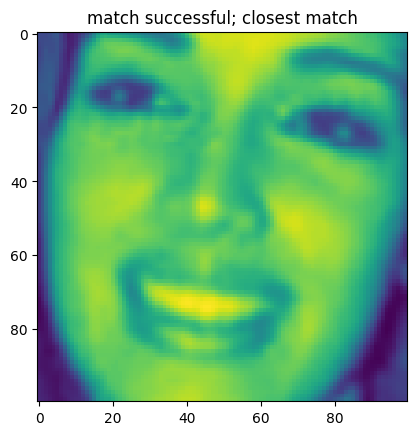

In [ ]:
threshold_dist = 1000
plt.imshow(faces[min_index].reshape(100, 100))

if(match_distance < threshold_dist):
    plt.title("match successful; closest match")
else:
    plt.title("match unsuccessful; closest match")

plt.show()
